**Homework 6 Template**

Make a copy of this and save as "hw6_name.ipynb"

Name: Jamison Wolsborn

Comments for instructor:


In [305]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import electron_mass, Planck, electron_volt, speed_of_light, Boltzmann

**Exercise 6.12**
The biochemical process of *glycolysis*, the
  breakdown of glucose in the body to release energy, can be modeled by the
  equations
$$
{dx\over dt} = -x + ay + x^2 y, \qquad
{dy\over  dt} = b - ay - x^2 y.
$$

Here $x$ and $y$ represent concentrations of two chemicals, ADP and F6P,
and $a$ and $b$ are positive constants.  One of the important features of
nonlinear linear equations like these is their *stationary
  points*, meaning values of $x$ and $y$ at which the derivatives of both
variables become zero simultaneously, so that the variables stop changing
and become constant in time.  Setting the derivatives to zero above, the
stationary points of our glycolysis equations are solutions of

$$
-x + ay + x^2 y = 0, \qquad b - ay - x^2 y = 0.
$$


**a)** Demonstrate analytically that the solution of these equations is

$$
x = b,\qquad y = {b\over a+b^2}
$$

$$ ay + x^2 y = x $$

$$ b = ay + x^2 y $$

$$ x = b $$ 

$$ $$

$$ b = y(a + x^2) $$

$$ y = \frac{b}{a + x^2} $$

$$ y = \frac{b}{a + b^2} $$

**Pts /5**

**b)** Show that the equations can be rearranged to read

$$
x = y(a+x^2),\qquad y = {b\over a+x^2}
$$

and write a program to solve these for the stationary point using the
relaxation method with $a=1$ and $b=2$.  You should find that the method
fails to converge to a solution in this case.

$$ x = b $$

$$ b = y(a+x^2) $$

$$ x = y(a+x^2) $$

derivation for $y = \frac{b}{a+x^2}$ can be found above

In [182]:
#values of a and b
a = 1.0
b = 2.0

#starting values of x, y
x, y = .01,.01

def f(x,y):
    return y*(a + x**2)

def g(x,y):
    return b/(a+x**2)

for i in range(20):
    x = f(x,y)
    y = g(x,y)

print(x,y)

#Why does this end up working?

2.0 0.4


**Pts /10**

**c)**  Find a different way to rearrange the equations such that when you
  apply the relaxation method again it now converges to a fixed point and
  gives a solution.  Verify that the solution you get agrees with part (a).

In [179]:
#values of a and b
a = 1.0
b = 2.0

#starting values of x, y
x, y = .01,.01

def f(x,y):
    return np.sqrt(b/y-a)

def g(x,y):
    return x/(a+x**2)

for i in range(20):
    x = f(x,y)
    y = g(x,y)

print(x,y)


#I get valid answers for both of the functions 
# x = 2 ,  y = 2/(1+4) = .4

2.0000000682414076 0.3999999918110312


**Pts /5**

**Total Exercise Pts /20**

**Exercise 6.14**

Consider a square potential well of width $w$, with walls of height $V$:

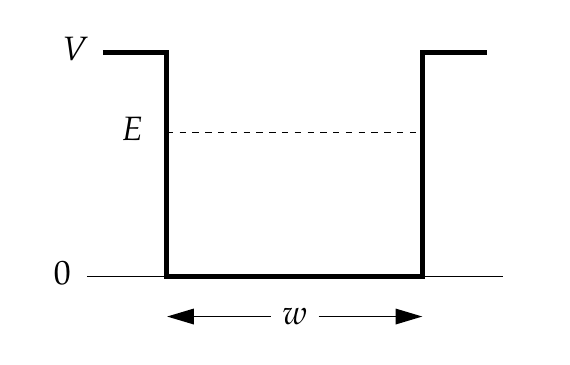


Using Schr${\"o}$dinger's equation, it can be shown that the allowed
energies $E$ of a single quantum particle of mass $m$ trapped in the well
are solutions of
$
\tan \sqrt{w^2mE/2\hbar^2} = \left\lbrace\begin{array}{ll}
  \sqrt{(V-E)/E} & \qquad\mbox{for the even numbered states,} \\
  - \sqrt{E/(V-E)}  & \qquad\mbox{for the odd numbered states,}
\end{array}\right.
$

where the states are numbered starting from 0, with the ground state being
state 0, the first excited state being state 1, and so forth.

**a)**

 For an electron (mass $9.1094\times10^{-31}\,$kg) in a well with $V =
  20\,$eV and $w = 1\,$nm, write a Python program to plot the three
  quantities

$$
y_1 = \tan \sqrt{w^2mE/2\hbar^2},\qquad
y_2 = \sqrt{V-E\over E},\qquad
y_3 = -\sqrt{E\over V-E},
$$

on the same graph, as a function of $E$ from $E=0$ to $E=20\,$eV.  From
your plot make approximate estimates of the energies of the first six
energy levels of the particle.  Hint: Zoom into your plot about y=0. 


<ipython-input-205-ffcaece2ef41>:11: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt((V-E)/E) #evens equation
<ipython-input-205-ffcaece2ef41>:14: RuntimeWarning: divide by zero encountered in true_divide
  return -np.sqrt(E/(V-E)) #odds equations
<ipython-input-205-ffcaece2ef41>:14: RuntimeWarning: invalid value encountered in sqrt
  return -np.sqrt(E/(V-E)) #odds equations


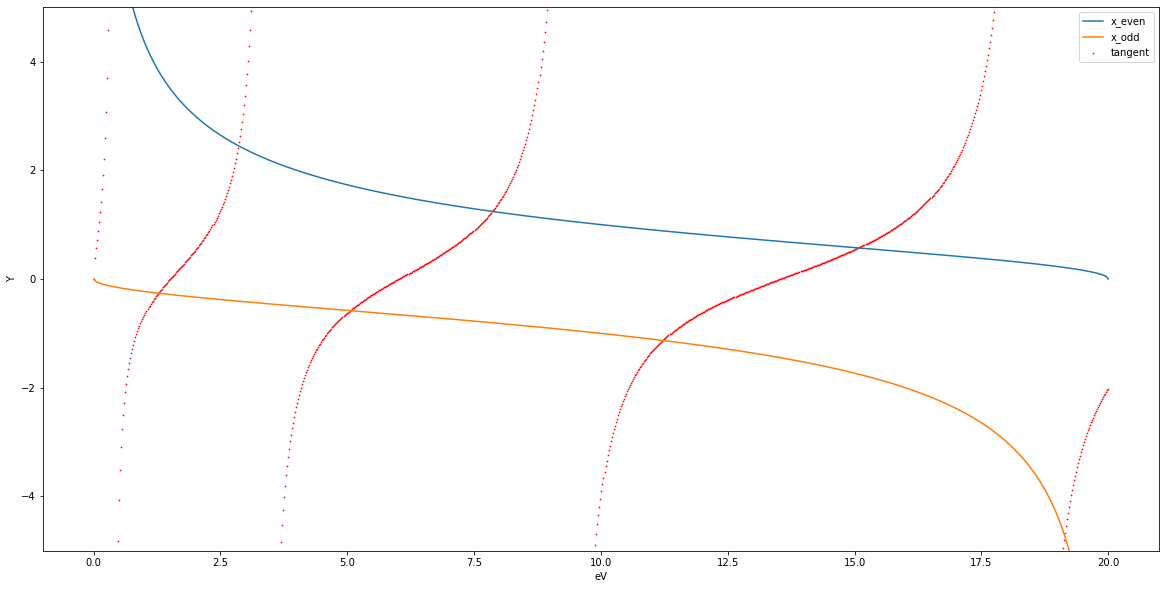

In [205]:
w = 1e-9 #meters
V = 20 #electron volts
m = electron_mass
h = Planck/2/np.pi #hbar
e = electron_volt #charge of electron

def shrodinger(E):
    return np.tan(np.sqrt(w**2*m/e*E/2/(h/e)**2)) #added /e for some coefficients to change units?

def even(E):
    return np.sqrt((V-E)/E) #evens equation

def odd(E):
    return -np.sqrt(E/(V-E)) #odds equations

x_schro = np.linspace(0,20,1000)
x_even = np.linspace(0,10,1000)*2 #evens
x_odd = np.linspace(0,10,1000)*(2+1) #odds

plt.figure(figsize=(20,10))
#plt.plot(x_schro,shrodinger(x_schro))
plt.scatter(x_schro,shrodinger(x_schro), c = 'red', s = .5, label = 'tangent')
plt.plot(x_even, even(x_even), label = 'x_even')
plt.plot(x_odd, odd(x_odd), label = 'x_odd')
plt.ylim(-5,5)
plt.xlabel("eV") #I think eV are the units
plt.ylabel('Y')
plt.legend(loc = 'upper right')

**Type estimates of energy here**

**Pts /10**

**b)** Write a second program to calculate the values of the first six
  energy levels in electron volts to an accuracy of $0.001\,$eV using
  binary search. Have your program output the 6 values in units of eV.  Hint. Zoom into your plot to define appropriate initial intervals.
 


In [143]:
accuracy = .001 #eV

x1 = []
x2 = []

IndentationError: expected an indented block (<ipython-input-143-1fbd9492fcec>, line 8)

**Pts /10**

**Total Exercise Pts /20**

**Exercise 6.16**

There is a magical point between the Earth and the Moon, called the $L_1$ Lagrange point, at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.  This works because the inward pull of the Earth and the outward pull of the Moon combine to create exactly the needed centripetal force that keeps the satellite in its orbit. Check your textbook for a diagram of the setup.

**a)** Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, show that the distance $r$ from the center of the Earth to the $L_1$ point satisfies

\begin{equation*}
{GM\over r^2} - {Gm\over(R-r)^2} = \omega^2 r,
\end{equation*}

where $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's
gravitational constant, and $\omega$ is the angular velocity of both the
Moon and the satellite.

$$ \frac{GM(R-r)^2}{(r^2)(R-r)^2} - \frac{Gm(r^2)}{(r^2)(R-r)^2} = \omega^2r$$

$$ GM(R-r)^2 - Gmr^2 = \omega^2rr^2(R-r)^2 $$

$$ GMR^2 + GMr^2 - 2GMRr - Gmr^2 = \omega^2r^3(R^2+r^2-2Rr) $$

$$ GMR^2 + GMr^2 - 2GMRr - Gmr^2 = \omega^2R^2r^3 + \omega^2r^5 - 2\omega^2Rr^4 $$

$$ \omega^2r^5 - 2\omega^2Rr^4 + \omega^2R^2r^3 - (GM - Gm)r^2 + 2GMRr - GMR^2 = 0 $$

**Pts /5**

**b)** The equation above is a fifth-order polynomial equation in $r$ (also called a quintic equation).  Such equations cannot be solved exactly in closed form, but it's straightforward to solve them numerically.  Write a program that uses Newton's method to solve for the distance $r$ from the Earth to the $L_1$ point.  Compute a solution accurate to at least four significant figures.

  The values of the various parameters are:
\begin{align*}
G &= 6.674\times10^{-11}\,\mathrm{m}^3\mathrm{kg}^{-1}\mathrm{s}^{-2}, \\
M &= 5.974\times10^{24}\,\mathrm{kg}, \\
m &= 7.348\times10^{22}\,\mathrm{kg}, \\
R &= 3.844\times10^8\,\mathrm{m}, \\
\omega &= 2.662\times10^{-6}\,\mathrm{s}^{-1}.
\end{align*}
You will also need to choose a suitable starting value for $r$. Think about what value r should be. 

In [178]:
accuracy = 1e-6 #accuracy up to 6 sig figs because why not. 

G = 6.674e-11 #newtons gravitational constant
M = 5.974e24 #mass of earth
m = 7.348e22 #mass of moon
R = 3.844e8 #distance from earth to moon
w = 2.662e-6 #angular velocity of moon and satellite

start_value = 6378000 #starts at the crust of the earth. 

def f(r): #used from my derivation above
    return w**2*r**5 - 2*w**2*R*r**4 + w**2*R**2*r**3 - (G*M - G*m)*r**2 + 2*G*M*R*r - G*M*R**2

def f_prime(r): #analytic derivative of f(r)
    return 5*w**2*r**4 - 4*2*w**2*R*r**3 + 3*w**2*R**2*r**2 - 2*(G*M - G*m)*r + 2*G*M*R

r = start_value 
delta = f(r) / f_prime(r) #initializing delta
#this function can be found in page 272 of the textbook
while abs(delta) > accuracy:
    delta = f(r) / f_prime(r) #
    r -= delta 

print(r)

326045071.66535574


**Pts /10**

**Total Exercise Pts /15**

**Exercise 6.18**

An incandescent light bulb is a simple device---it contains a filament, usually made of tungsten, heated by the flow of electricity until it becomes hot enough to radiate thermally.  Essentially all of the power consumed by such a bulb is radiated as electromagnetic energy, but some of the radiation is not in the visible wavelengths, which means it is useless
for lighting purposes.

Let us define the efficiency of a light bulb to be the fraction of the radiated energy that falls in the visible band.  It's a good approximation to assume that the radiation from a filament at temperature $T$ obeys the Planck radiation law, meaning that the power radiated per unit wavelength $\lambda$ obeys

\begin{equation*}
  I(\lambda) = 2\pi A hc^2 {\lambda^{-5}\over e^{hc/\lambda k_BT}-1},
\end{equation*}

where $A$ is the surface area of the filament, $h$ is Planck's constant, $c$ is the speed of light, and $k_B$ is Boltzmann's constant.  The visible wavelengths run from $\lambda_1=390\,$nm to $\lambda_2=750\,$nm, so the total energy radiated in the visible window is $\int_{\lambda_1}^{\lambda_2} I(\lambda)\> d\lambda$ and the total energy at all wavelengths is $\int_0^\infty I(\lambda)\> d\lambda$.  Dividing one expression by the other and substituting for $I(\lambda)$ from above, we
get an expression for the efficiency $\eta$ of the light bulb thus:

\begin{equation*}
\eta = {\int_{\lambda_1}^{\lambda_2} \lambda^{-5}/(e^{hc/\lambda
        k_BT}-1) \> d\lambda\over
        \int_0^\infty \lambda^{-5}/(e^{hc/\lambda k_BT}-1) \> d\lambda},
\end{equation*}

where the leading constants and the area $A$ have canceled out.  Making the substitution $x=hc/\lambda k_BT$, this can also be written as

\begin{equation*}
\eta = {\int_{hc/\lambda_2 k_BT}^{hc/\lambda_1 k_BT} x^3/(e^x-1) \> d x
        \over \int_0^\infty x^3/(e^x-1) \> d x}
     = {15\over\pi^4}
       \int_{hc/\lambda_2 k_BT}^{hc/\lambda_1 k_BT}
       {x^3\over e^x-1} \> d x,
\end{equation*}

where we have made use of the known exact value of the integral in the
denominator.

**a)** Write a Python function that takes a temperature $T$ as its argument and calculates the value of $\eta$ for that temperature from the formula above.  The integral in the formula cannot be done analytically, but you can do it numerically using any method of your choice.  (For instance, Gaussian quadrature with 100 sample points works fine.)  Use your function to make a graph of $\eta$ as a function of temperature between $300\,$K and $10\,000\,$K.  You should see that there is an intermediate temperature where the efficiency is a maximum.

Text(0, 0.5, 'Efficiency')

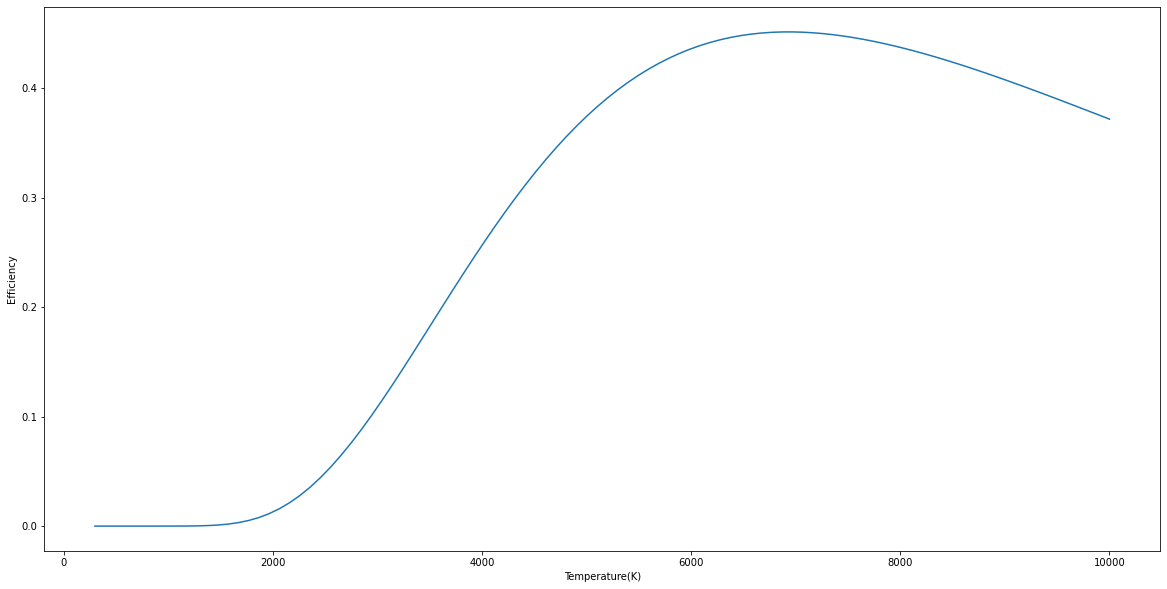

In [221]:
from gaussxw import gaussxwab

h = Planck
c = speed_of_light
lam1 = 390e-9
lam2 = 750e-9
kB = Boltzmann

def cv(T):
    f = lambda x: x**3/(np.exp(x)-1)
    a = h*c/lam2/kB/T
    b = h*c/lam1/kB/T
    N = 100
    
    x,w = gaussxwab(N,a,b)
    
    C = 15/np.pi**4
    I = sum(w,f(x))
    
    I = []
    for i in range(len(x)):
        I.append(w[i]*f(x[i]))
    
    return C*sum(I)

T = np.linspace(300,10000,100)
efficiency = [cv(Ti) for Ti in T]

plt.figure(figsize = (20,10))
plt.plot(T,efficiency)
plt.xlabel('Temperature(K)')
plt.ylabel('Efficiency')

**Pts /10**

**b)** Calculate the temperature of maximum efficiency of the light bulb to within $1\,$K using golden ratio search.  (Hint: An accuracy of $1\,$K is the equivalent of a few parts in ten thousand in this case.  To get this kind of accuracy in your calculation you'll need to use values for the fundamental constants that are suitably accurate, i.e., you will need values accurate to several significant figures.)

In [277]:
accuracy = 1e-6

z = (1+np.sqrt(5))/2
h = Planck
c = speed_of_light
lam1 = 390e-9
lam2 = 750e-9
kB = Boltzmann

def cv_new(T):
    f = lambda x: x**3/(np.exp(x)-1)
    a = h*c/lam2/kB/T
    b = h*c/lam1/kB/T
    N = 100
    
    x,w = gaussxwab(N,a,b)
    
    C = 15/np.pi**4
    I = sum(w,f(x))
    
    I = []
    for i in range(len(x)):
        I.append(w[i]*f(x[i]))
    
    return -C*sum(I) #changed this to be -f(x)

#initial points
x1 = 2000
x4 = 9000
x2 = x4 - (x4 - x1)/z
x3 = x4 + (x4 - x1)/z

#initial y values
y1 = cv_new(x1)
y2 = cv_new(x2)
y3 = cv_new(x3)
y4 = cv_new(x4)


while (x4 - x1) > accuracy:
    if y2 < y3:
        x4 = x3
        #y4 = y3
        x3 = x2
        #y3 = y2
        x2 = x4 - (x4 - x1)/z
        y2 = cv_new(x2)
    else:
        x1 = x2
        #y1 = y2
        x2 = x3
        #y2 = y3
        x3 = x4 + (x4 - x1)/z
        y3 = cv_new(x3)

maximum = (x2 + x3)/2

print(maximum)
#this is not the right answer, answer changes as I change the bounds

4673.762078750736


**Pts /10**

**Total Exercise Pts /20**

In [8]:
#Type your code here

**Exercise 7.2**

In the on-line resources there is a file called _sunspots.txt_, which contains the observed number of sunspots on the Sun for each month since January 1749.  The file contains two columns of numbers, the first representing the month and the second being the sunspot number.

**a)** Write a program that reads the data in the file and makes a graph of sunspots as a function of time.  You should see that the number of sunspots has fluctuated on a regular cycle for as long as observations have been recorded.  Make an estimate of the length of the cycle in months.

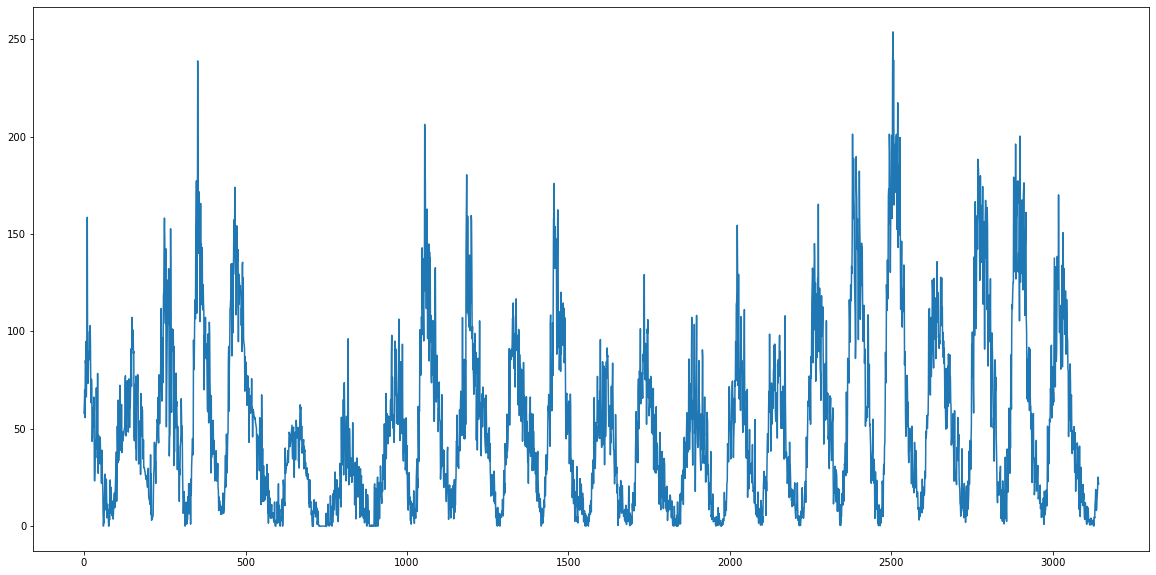

In [294]:
sunspots = np.loadtxt('Lectures/sunspots.txt', float)
x = sunspots[:,0]
y = sunspots[:,1]
plt.figure(figsize=(20,10))
plt.plot(x,y)

**Pts /5**

**b)** Modify your program to calculate the Fourier transform of the sunspot data and then make a graph of the magnitude squared $|c_k|^2$ of the Fourier coefficients as a function of $k$---also called the _power spectrum_ of the sunspot signal.  You should see that there is a noticeable peak in the power spectrum at a nonzero value of $k$.  The appearance of this peak tells us that there is one frequency in the Fourier series that has a higher amplitude than the others around it---meaning that there is a large sine-wave term with this frequency, which corresponds to the periodic wave you can see in the original data.

[ 1.63198700e+05    +0.j          1.44145827e+04+15191.16504726j
 -1.05413560e+03+16829.90354705j ...  8.87444333e+01  +426.27178325j
  8.18389672e+02  -276.51197688j  5.93462732e+02  -891.21893228j]


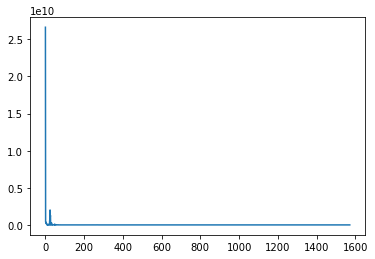

In [304]:
def dft(y):
    N = len(y)
    c = np.zeros(N//2+1, complex)
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*np.exp(-2j * np.pi * k * n / N)
    return c

def power_spec(c):
    return abs(c)**2

c = dft(y)

plt.plot(power_spec(c))

print(c)

**Pts /10**

**c)**  Find the approximate value of $k$ to which the peak corresponds.
  What is the period of the sine wave with this value of $k$?  You should
  find that the period corresponds roughly to the length of the cycle that
  you estimated in part (a).

*Type your answer here*

**Pts /5**

**Total Exercise Pts /20**

**Total Pts /95**